In [1]:
import sys
sys.path.append('../src/')
import os
import math
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
%load_ext autoreload
%autoreload 2

import utils

In [3]:
repo_path = '/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets'
experiments_path = os.path.join(repo_path, 'experiments')
models_path = os.path.join(repo_path, 'models_extra')

Power law RMSE: 1.6163

GP pow RMSE: 1.6147
Uniform probability mass: 0.0462
GP pow probability mass: 0.3854
GP pow 80% coverage: 60.00%
GP pow 95% coverage: 80.00%



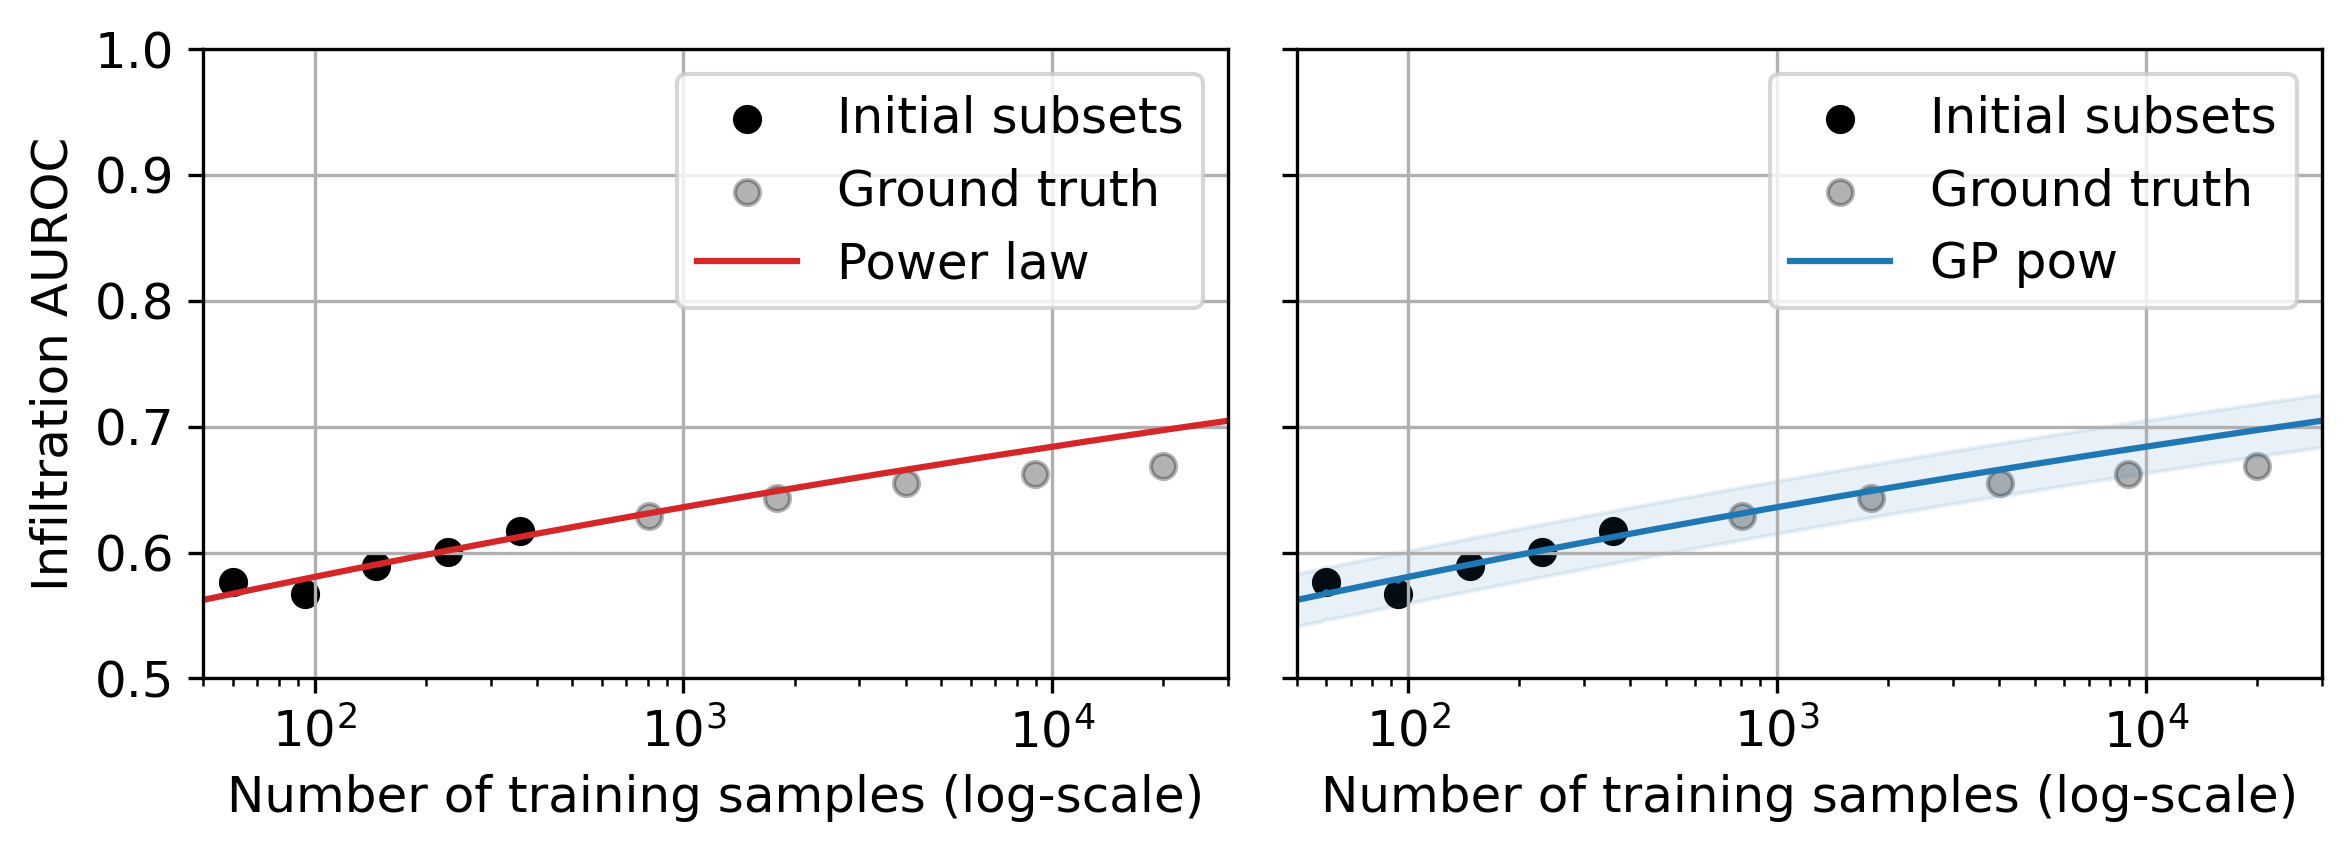

In [4]:
dataset_name, filename = 'ChestX-ray14', 'ChestX-ray14_long_range.csv'
df = utils.load_experiment(os.path.join(experiments_path, filename))
# Take mean of each random seed at each dataset size
df = df.groupby('n').agg(lambda x: list(x))
df.test_auroc = df.test_auroc.apply(lambda x: np.mean(x, axis=0))
df.random_state = df.random_state.apply(lambda x: 'mean')
df = df.reset_index()

label_index = 2
plot_objects = zip(['Infiltration', 'Infiltration'], ['PowerLaw', 'GPPowerLaw'], ['#d62728', '#1f77b4'])
ncols, nrows = 2, 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), sharey=True, dpi=300)
for subplot_index, (label_name, model_name, color) in enumerate(plot_objects):
    # Plot data
    X_train, y_train, X_test, y_test = utils.split_df(df, index=label_index)
    utils.plot_data(np.array(axs).flatten()[subplot_index], X_train, y_train, X_test, y_test)
    # Load model
    model_filename = '{}_{}_{}.pt'.format(dataset_name, label_name, model_name)
    model_filepath = os.path.join(models_path, model_filename)
    model_objects = utils.load_model(model_name, model_filepath, X_train, y_train)
    utils.print_metrics(model_objects, y_train, X_test, y_test)
    utils.plot_model(np.array(axs).flatten()[subplot_index], model_objects, color)
    utils.format_plot(np.array(axs).flatten()[subplot_index], label_name)
    np.array(axs).flatten()[subplot_index].legend()
# Set grid for each plot
for i in range(ncols*nrows): np.array(axs).flatten()[i].grid()
np.array(axs).flatten()[-1].set_ylabel(None)
fig.tight_layout()
plt.show()

0
GP pow RMSE: 1.8604
Uniform probability mass: 0.0614
GP pow probability mass: 0.2971
GP pow 80% coverage: 40.00%
GP pow 95% coverage: 60.00%

GP arc RMSE: 2.9480
Uniform probability mass: 0.0614
GP arc probability mass: 0.1949
GP arc 80% coverage: 20.00%
GP arc 95% coverage: 40.00%

1
GP pow RMSE: 3.9707
Uniform probability mass: 0.0624
GP pow probability mass: 0.1269
GP pow 80% coverage: 20.00%
GP pow 95% coverage: 20.00%

GP arc RMSE: 3.9670
Uniform probability mass: 0.0624
GP arc probability mass: 0.1267
GP arc 80% coverage: 20.00%
GP arc 95% coverage: 20.00%

2
GP pow RMSE: 1.6147
Uniform probability mass: 0.0462
GP pow probability mass: 0.3854
GP pow 80% coverage: 60.00%
GP pow 95% coverage: 80.00%

GP arc RMSE: 15.2429
Uniform probability mass: 0.0462
GP arc probability mass: 0.0005
GP arc 80% coverage: 0.00%
GP arc 95% coverage: 0.00%

3
GP pow RMSE: 1.0663
Uniform probability mass: 0.1127
GP pow probability mass: 0.4729
GP pow 80% coverage: 66.67%
GP pow 95% coverage: 100.00%

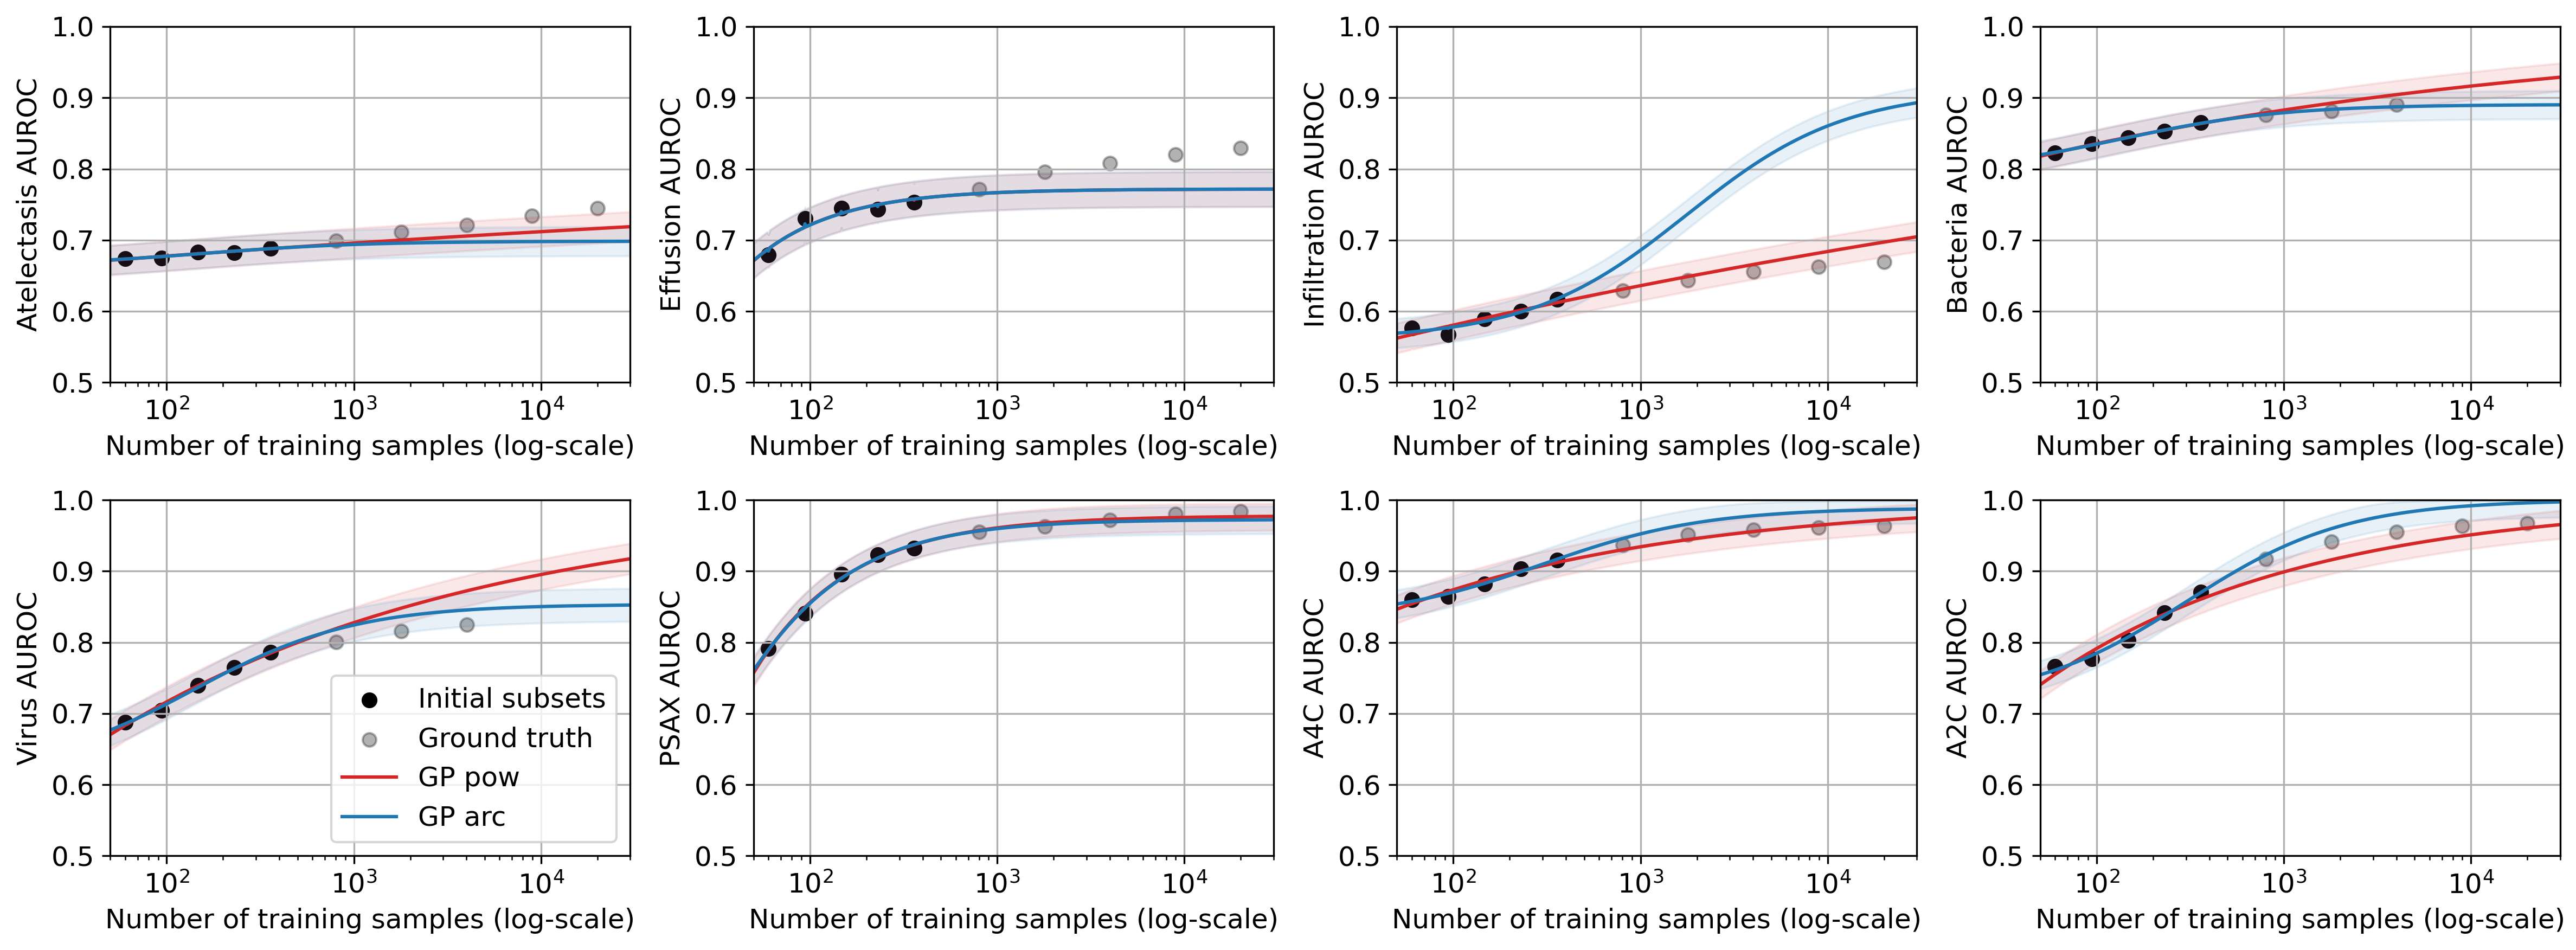

In [5]:
datasets = [('ChestX-ray14', 'ChestX-ray14_long_range.csv'),
            ('Chest_X-Ray', 'Chest_X-Ray_long_range.csv'),
            ('TMED-2', 'TMED-2_long_range.csv')]
labels = [['Atelectasis', 'Effusion', 'Infiltration'],
          ['Bacteria', 'Virus'],
          ['PSAX', 'A4C', 'A2C']]
labels_index = [[0, 1, 2],
                [0, 1],
                [1, 2, 3]]
models = ['GPPowerLaw', 'GPArctan']
colors = ['#d62728', '#1f77b4']

subplot_index = -1
ncols, nrows = 4, 2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), dpi=300)

for dataset_index, dataset in enumerate(datasets):
    dataset_name, filename = dataset
    df = utils.load_experiment(os.path.join(experiments_path, filename))
    # Take mean of each random seed at each dataset size
    df = df.groupby('n').agg(lambda x: list(x))
    df.test_auroc = df.test_auroc.apply(lambda x: np.mean(x, axis=0))
    df.random_state = df.random_state.apply(lambda x: 'mean')
    df = df.reset_index()

    for label_index, label_name in zip(labels_index[dataset_index], labels[dataset_index]):
        subplot_index = subplot_index+1
        print(subplot_index)
        # Plot data
        X_train, y_train, X_test, y_test = utils.split_df(df, index=label_index)
        utils.plot_data(np.array(axs).flatten()[subplot_index], X_train, y_train, X_test, y_test)
        # Load model
        for model_name, color in zip(models, colors):
            model_filename = '{}_{}_{}.pt'.format(dataset_name, label_name, model_name)
            model_filepath = os.path.join(models_path, model_filename)
            model_objects = utils.load_model(model_name, model_filepath, X_train, y_train)
            utils.print_metrics(model_objects, y_train, X_test, y_test)
            utils.plot_model(np.array(axs).flatten()[subplot_index], model_objects, color)
        utils.format_plot(np.array(axs).flatten()[subplot_index], label_name)
# Add legend to left most plot        
np.array(axs).flatten()[4].legend()
# Set grid for each plot
for i in range(ncols*nrows): np.array(axs).flatten()[i].grid()
fig.tight_layout()
plt.show()

0
GP pow RMSE: 0.3443
Uniform probability mass: 0.0614
GP pow probability mass: 0.6299
GP pow 80% coverage: 100.00%
GP pow 95% coverage: 100.00%

GP arc RMSE: 0.3964
Uniform probability mass: 0.0614
GP arc probability mass: 0.6267
GP arc 80% coverage: 100.00%
GP arc 95% coverage: 100.00%

1
GP pow RMSE: 0.6730
Uniform probability mass: 0.0624
GP pow probability mass: 0.5163
GP pow 80% coverage: 100.00%
GP pow 95% coverage: 100.00%

GP arc RMSE: 0.6727
Uniform probability mass: 0.0624
GP arc probability mass: 0.5089
GP arc 80% coverage: 100.00%
GP arc 95% coverage: 100.00%

2
GP pow RMSE: 0.3193
Uniform probability mass: 0.0462
GP pow probability mass: 0.6302
GP pow 80% coverage: 100.00%
GP pow 95% coverage: 100.00%

GP arc RMSE: 2.2404
Uniform probability mass: 0.0462
GP arc probability mass: 0.1929
GP arc 80% coverage: 20.00%
GP arc 95% coverage: 40.00%

4
GP pow RMSE: 0.2103
Uniform probability mass: 0.1127
GP pow probability mass: 0.6700
GP pow 80% coverage: 100.00%
GP pow 95% cover

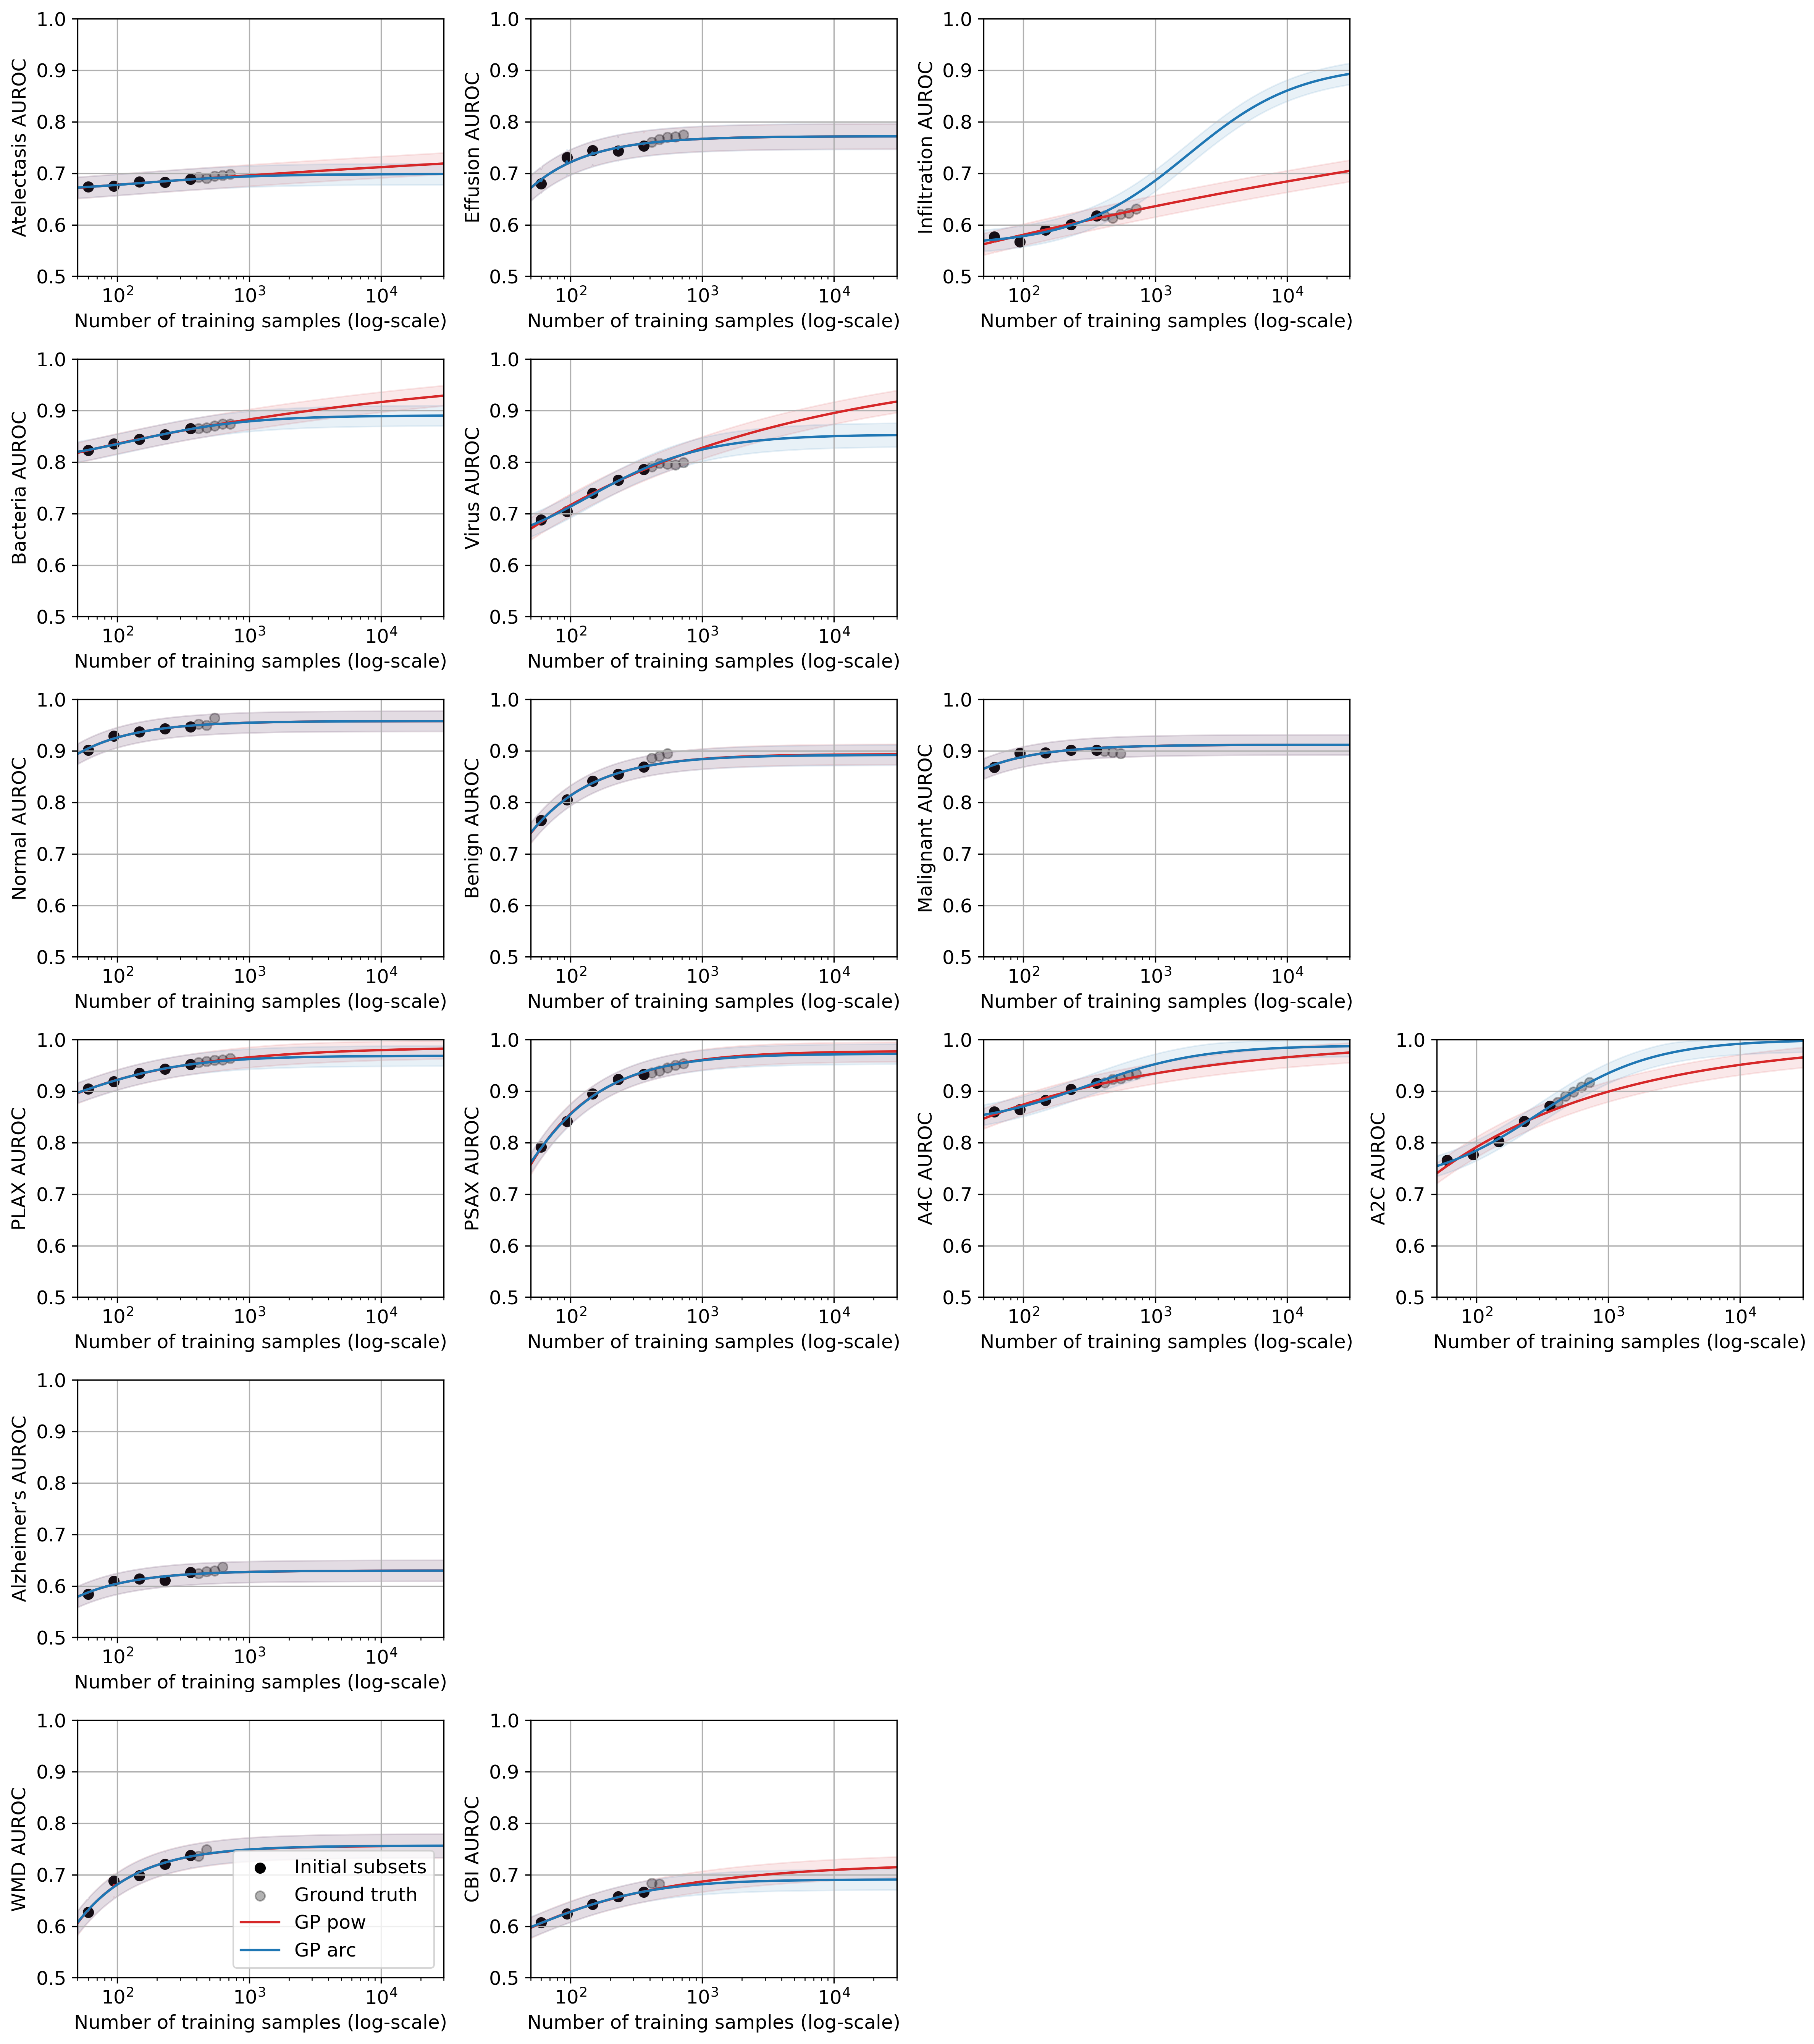

In [6]:
datasets = [('ChestX-ray14', 'ChestX-ray14_short_range.csv'),
            ('Chest_X-Ray', 'Chest_X-Ray_short_range.csv'),
            ('BUSI', 'BUSI_short_range.csv'),
            ('TMED-2', 'TMED-2_short_range.csv'),
            ('OASIS-3', 'OASIS-3_short_range.csv'),
            ('Pilot', 'Pilot_short_range.csv')]
labels = [['Atelectasis', 'Effusion', 'Infiltration'],
          ['Bacteria', 'Virus'],
          ['Normal', 'Benign', 'Malignant'],
          ['PLAX', 'PSAX', 'A4C', 'A2C'],
          ['Alzheimer’s'],
          ['WMD', 'CBI']]
models = ['GPPowerLaw', 'GPArctan']
colors = ['#d62728', '#1f77b4']

ncols, nrows = 4, 6
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), dpi=300)

for dataset_index, dataset in enumerate(datasets):
    dataset_name, filename = dataset
    df = utils.load_experiment(os.path.join(experiments_path, filename))
    # Take mean of each random seed at each dataset size
    df = df.groupby('n').agg(lambda x: list(x))
    df.test_auroc = df.test_auroc.apply(lambda x: np.mean(x, axis=0))
    df.random_state = df.random_state.apply(lambda x: 'mean')
    df = df.reset_index()

    for label_index, label_name in enumerate(labels[dataset_index]):
        subplot_index = (dataset_index*ncols)+label_index
        print(subplot_index)
        # Plot data
        X_train, y_train, X_test, y_test = utils.split_df(df, index=label_index)
        utils.plot_data(np.array(axs).flatten()[subplot_index], X_train, y_train, X_test, y_test)
        # Load model
        for model_name, color in zip(models, colors):
            model_filename = '{}_{}_{}.pt'.format(dataset_name, label_name, model_name)
            model_filepath = os.path.join(models_path, model_filename)
            model_objects = utils.load_model(model_name, model_filepath, X_train, y_train)
            utils.print_metrics(model_objects, y_train, X_test, y_test)
            utils.plot_model(np.array(axs).flatten()[subplot_index], model_objects, color)
        utils.format_plot(np.array(axs).flatten()[subplot_index], label_name)
    for index in range(len(labels[dataset_index]), ncols):
        subplot_index = (dataset_index*ncols)+index
        utils.plot_blank(np.array(axs).flatten()[subplot_index])
# Add legend to left most plot        
np.array(axs).flatten()[20].legend(loc='lower right')
# Set grid for each plot
for i in range(ncols*nrows): np.array(axs).flatten()[i].grid()
fig.tight_layout()
plt.show()

0
GP pow RMSE: 1.8604
Uniform probability mass: 0.0614
GP pow probability mass: 0.2971
GP pow 80% coverage: 40.00%
GP pow 95% coverage: 60.00%

GP arc RMSE: 2.9480
Uniform probability mass: 0.0614
GP arc probability mass: 0.1949
GP arc 80% coverage: 20.00%
GP arc 95% coverage: 40.00%

1
GP pow RMSE: 3.9707
Uniform probability mass: 0.0624
GP pow probability mass: 0.1269
GP pow 80% coverage: 20.00%
GP pow 95% coverage: 20.00%

GP arc RMSE: 3.9670
Uniform probability mass: 0.0624
GP arc probability mass: 0.1267
GP arc 80% coverage: 20.00%
GP arc 95% coverage: 20.00%

2
GP pow RMSE: 1.6147
Uniform probability mass: 0.0462
GP pow probability mass: 0.3854
GP pow 80% coverage: 60.00%
GP pow 95% coverage: 80.00%

GP arc RMSE: 15.2429
Uniform probability mass: 0.0462
GP arc probability mass: 0.0005
GP arc 80% coverage: 0.00%
GP arc 95% coverage: 0.00%

4
GP pow RMSE: 1.0663
Uniform probability mass: 0.1127
GP pow probability mass: 0.4729
GP pow 80% coverage: 66.67%
GP pow 95% coverage: 100.00%

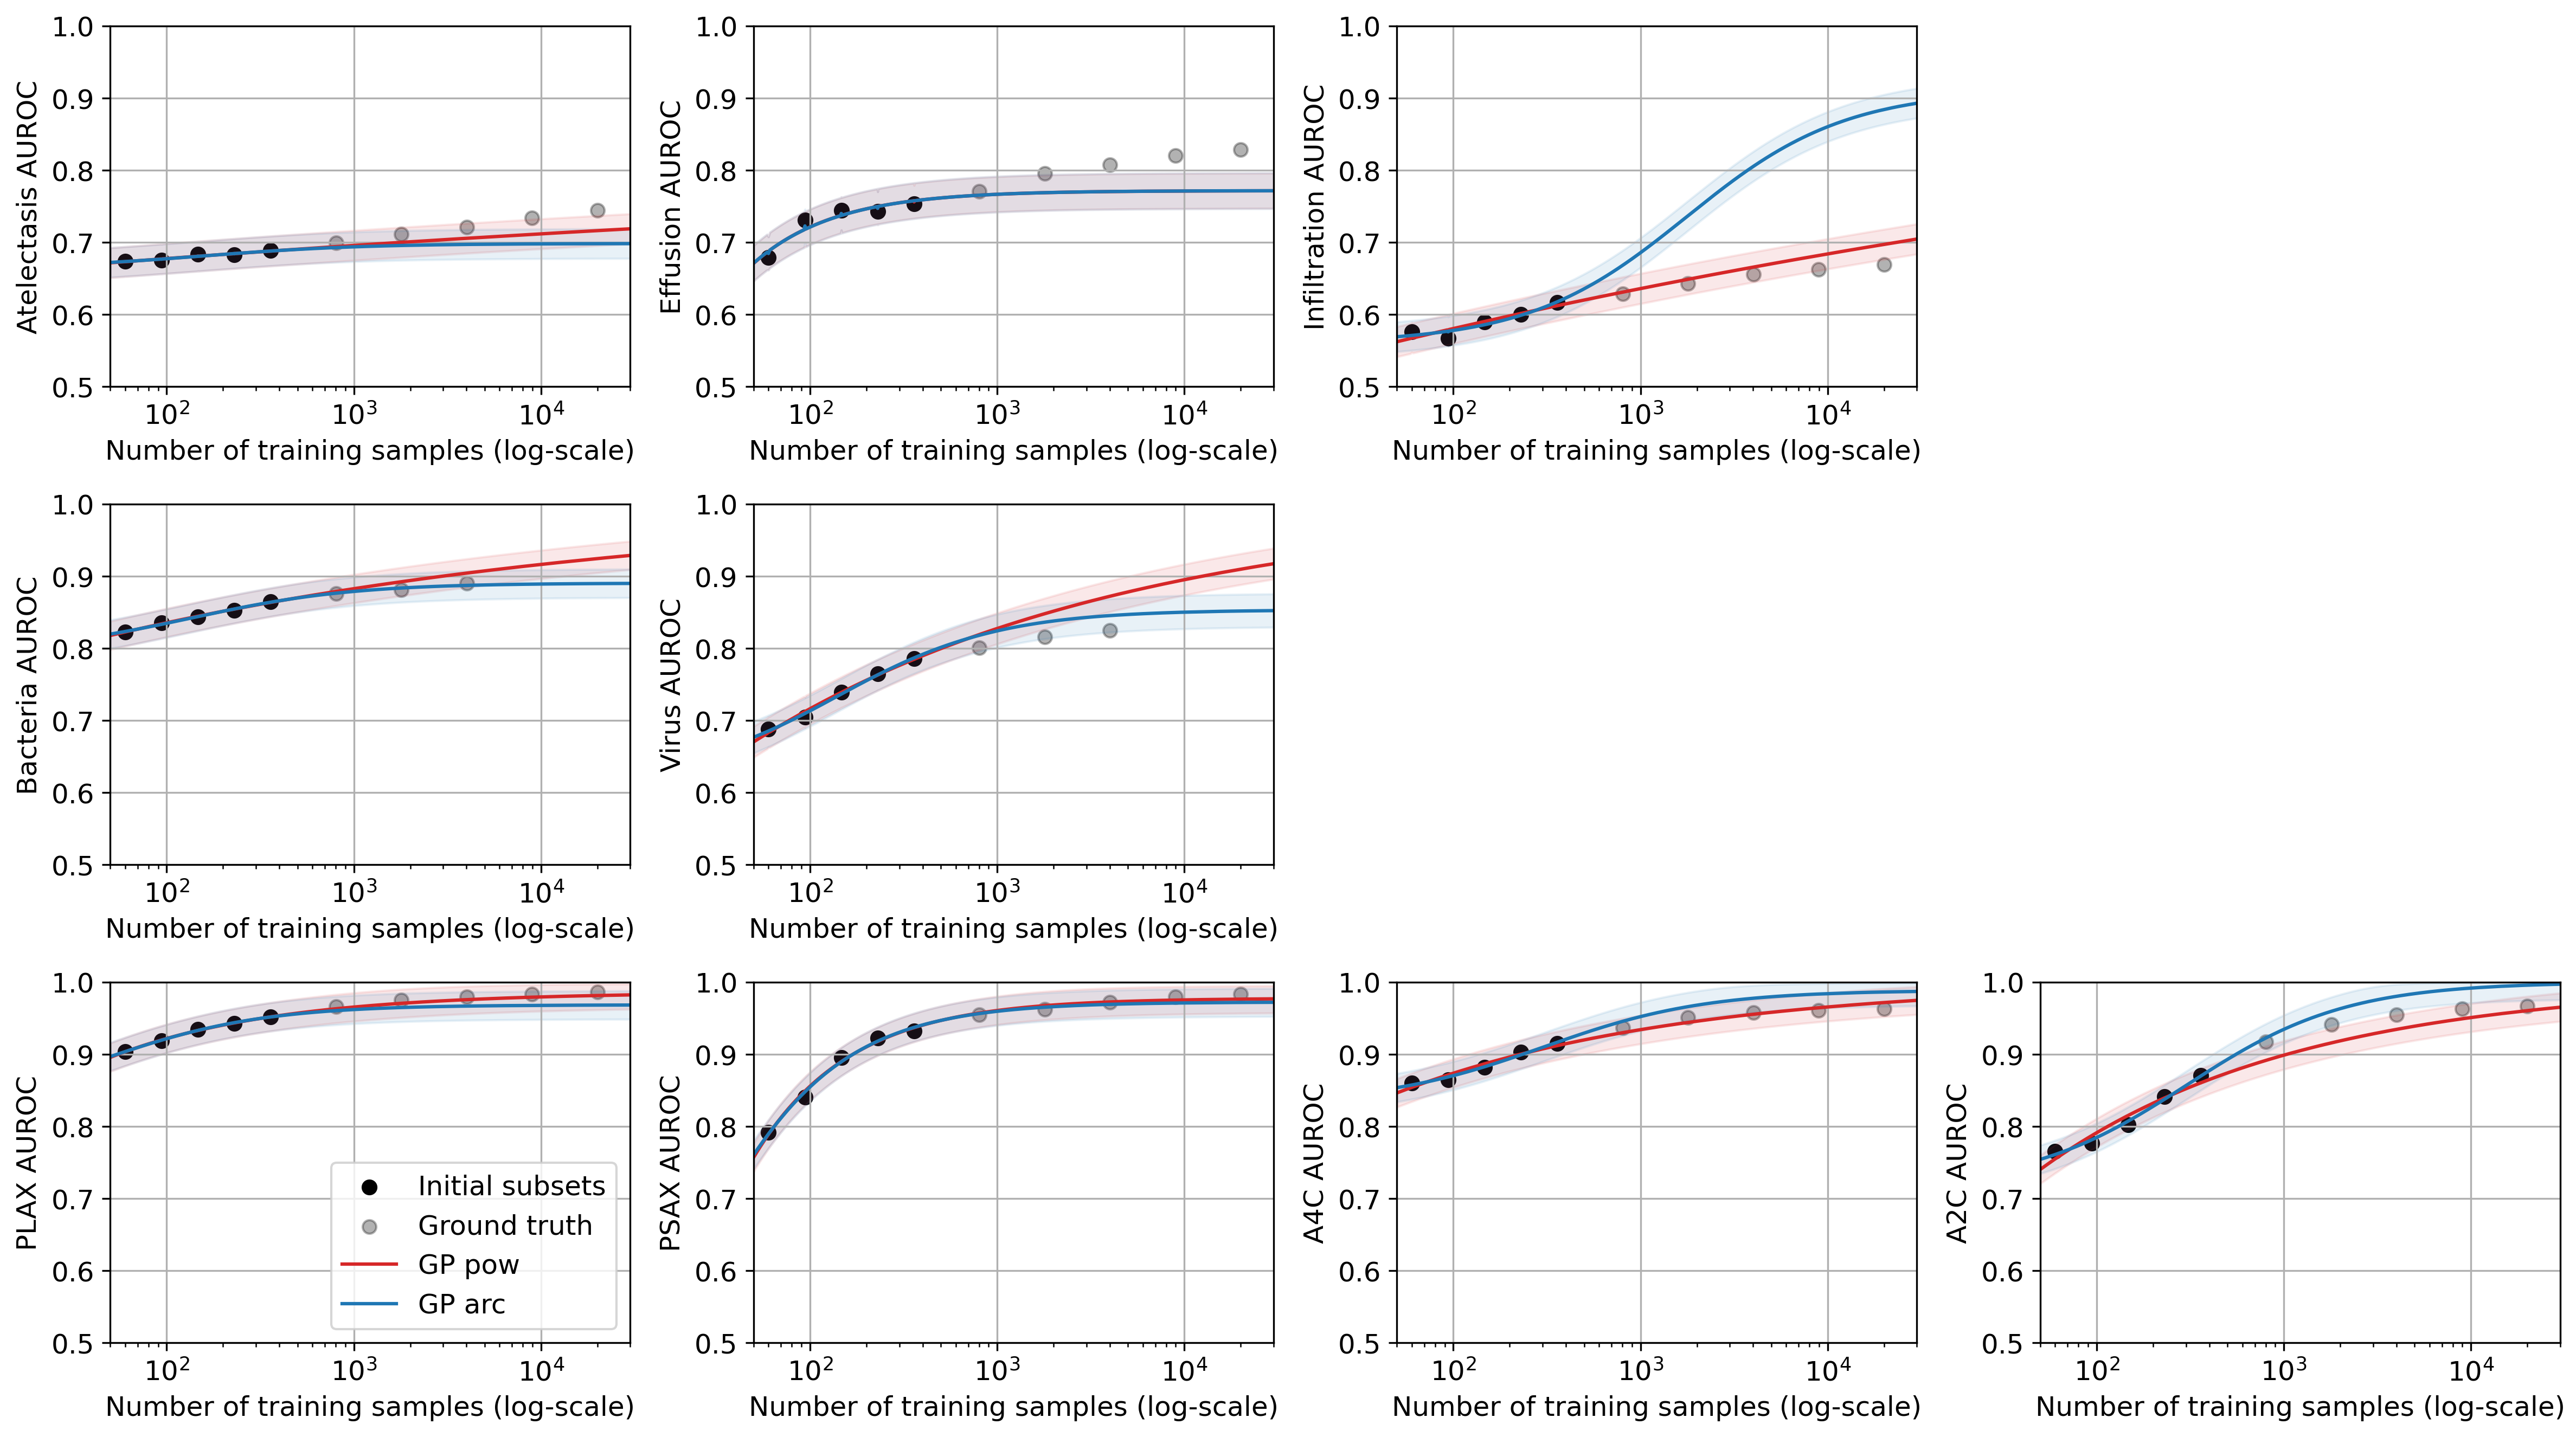

In [7]:
datasets = [('ChestX-ray14', 'ChestX-ray14_long_range.csv'),
            ('Chest_X-Ray', 'Chest_X-Ray_long_range.csv'),
            ('TMED-2', 'TMED-2_long_range.csv')]
labels = [['Atelectasis', 'Effusion', 'Infiltration'],
          ['Bacteria', 'Virus'],
          ['PLAX', 'PSAX', 'A4C', 'A2C']]
models = ['GPPowerLaw', 'GPArctan']
colors = ['#d62728', '#1f77b4']

ncols, nrows = 4, 3
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), dpi=300)

for dataset_index, dataset in enumerate(datasets):
    dataset_name, filename = dataset
    df = utils.load_experiment(os.path.join(experiments_path, filename))
    # Take mean of each random seed at each dataset size
    df = df.groupby('n').agg(lambda x: list(x))
    df.test_auroc = df.test_auroc.apply(lambda x: np.mean(x, axis=0))
    df.random_state = df.random_state.apply(lambda x: 'mean')
    df = df.reset_index()

    for label_index, label_name in enumerate(labels[dataset_index]):
        subplot_index = (dataset_index*ncols)+label_index
        print(subplot_index)
        # Plot data
        X_train, y_train, X_test, y_test = utils.split_df(df, index=label_index)
        utils.plot_data(np.array(axs).flatten()[subplot_index], X_train, y_train, X_test, y_test)
        # Load model
        for model_name, color in zip(models, colors):
            model_filename = '{}_{}_{}.pt'.format(dataset_name, label_name, model_name)
            model_filepath = os.path.join(models_path, model_filename)
            model_objects = utils.load_model(model_name, model_filepath, X_train, y_train)
            utils.print_metrics(model_objects, y_train, X_test, y_test)
            utils.plot_model(np.array(axs).flatten()[subplot_index], model_objects, color)
        utils.format_plot(np.array(axs).flatten()[subplot_index], label_name)
    for index in range(len(labels[dataset_index]), ncols):
        subplot_index = (dataset_index*ncols)+index
        utils.plot_blank(np.array(axs).flatten()[subplot_index])
# Add legend to left most plot        
np.array(axs).flatten()[8].legend(loc='lower right')
# Set grid for each plot
for i in range(ncols*nrows): np.array(axs).flatten()[i].grid()
fig.tight_layout()
plt.show()

GP pow 80% coverage at 5k: 100.00%
GP pow 95% coverage at 5k: 100.00%
GP pow 80% coverage at 10k: 100.00%
GP pow 95% coverage at 10k: 100.00%
GP pow 80% coverage at 20k: 100.00%
GP pow 95% coverage at 20k: 100.00%
GP pow 80% coverage at 5k: 100.00%
GP pow 95% coverage at 5k: 100.00%
GP pow 80% coverage at 10k: 100.00%
GP pow 95% coverage at 10k: 100.00%
GP pow 80% coverage at 20k: 100.00%
GP pow 95% coverage at 20k: 100.00%
GP pow 80% coverage at 5k: 100.00%
GP pow 95% coverage at 5k: 100.00%
GP pow 80% coverage at 10k: 99.00%
GP pow 95% coverage at 10k: 100.00%
GP pow 80% coverage at 20k: 95.00%
GP pow 95% coverage at 20k: 100.00%
GP pow 80% coverage at 5k: 60.00%
GP pow 95% coverage at 5k: 98.00%
GP pow 80% coverage at 10k: 94.00%
GP pow 95% coverage at 10k: 100.00%
GP pow 80% coverage at 20k: 100.00%
GP pow 95% coverage at 20k: 100.00%


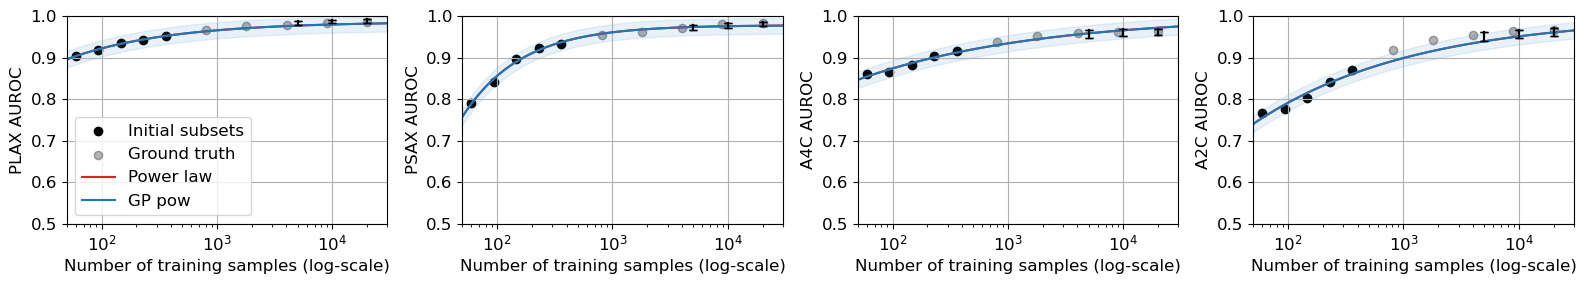

In [8]:
labels = ['Atelectasis', 'Effusion', 'Infiltration']
labels = ['PLAX', 'PSAX', 'A4C', 'A2C']
models = ['PowerLaw', 'GPPowerLaw']
#models = ['Arctan', 'GPArctan']
colors = ['#d62728', '#1f77b4']

dataset_name, filename = ('ChestX-ray14', 'ChestX-ray14_long_range.csv')
dataset_name, filename = ('TMED-2', 'TMED-2_long_range.csv')
df = utils.load_experiment(os.path.join(experiments_path, filename))
# Take mean of each random seed at each dataset size
df = df.groupby('n').agg(lambda x: list(x))
df.test_auroc = df.test_auroc.apply(lambda x: np.mean(x, axis=0))
df.random_state = df.random_state.apply(lambda x: 'mean')
df = df.reset_index()

sizes = [5000, 10000, 20000]
filenames = ['ChestX-ray14_5k.csv', 'ChestX-ray14_10k.csv', 'ChestX-ray14_20k.csv']
filenames = ['TMED-2_5k.csv', 'TMED-2_10k.csv', 'TMED-2_20k.csv']
dfs = [utils.load_experiment(os.path.join(experiments_path, filename)) for filename in filenames]
test_aurocs = [utils.grouped_mean_auroc(df) for df in dfs]

ncols, nrows = 4, 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3))
for label_index, label_name in enumerate(labels):
    # Plot data
    X_train, y_train, X_test, y_test = utils.split_df(df, index=label_index)
    utils.plot_data(np.array(axs).flatten()[label_index], X_train, y_train, X_test, y_test)
    # Load model
    for model_name, color in zip(models, colors):
        model_filename = '{}_{}_{}.pt'.format(dataset_name, label_name, model_name)
        model_filepath = os.path.join(models_path, model_filename)
        model_objects = utils.load_model(model_name, model_filepath, X_train, y_train)
        utils.plot_model(np.array(axs).flatten()[label_index], model_objects, color)
        # TODO: plot min and max of groupd_mean_auroc
        
        for size, test_auroc in zip(sizes, test_aurocs):
            utils.print_coverage(model_objects, size, test_auroc[:,label_index])
            utils.plot_min_max(np.array(axs).flatten()[label_index], size, test_auroc[:,label_index])
        
    utils.format_plot(np.array(axs).flatten()[label_index], label_name)
# Add legend to left most plot        
np.array(axs).flatten()[ncols*(nrows-1)].legend()
# Set grid for each plot
for i in range(ncols*nrows): np.array(axs).flatten()[i].grid()
fig.tight_layout()
plt.show()

In [9]:
paths = ['/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/TMED-2_10k_i={}.csv'.format(i) for i in range(10)]
dataframes = [utils.load_experiment(path) for path in paths]
stacked_df = pd.concat(dataframes, ignore_index=True)
print(stacked_df.shape)
stacked_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/TMED-2_10k_i=0.csv'

In [ ]:
paths = ['/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/notebooks/wmd.csv',
         '/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/notebooks/sbi.csv']
dataframes = [utils.load_experiment(path) for path in paths]
stacked_df = pd.concat(dataframes, ignore_index=True)
grouped_df = stacked_df.groupby(['n', 'random_state'])
df = grouped_df.agg(list).reset_index()
df['train_BA'] = df['train_BA'].apply(lambda item: np.array(item).ravel())
df['train_auroc'] = df['train_auroc'].apply(lambda item: np.array(item).ravel())
df['val_BA'] = df['val_BA'].apply(lambda item: np.array(item).ravel())
df['val_auroc'] = df['val_auroc'].apply(lambda item: np.array(item).ravel())
df['test_BA'] = df['test_BA'].apply(lambda item: np.array(item).ravel())
df['test_auroc'] = df['test_auroc'].apply(lambda item: np.array(item).ravel())
df.head()